HOW CO2 IS INFLUENCE ON CHINA GDP  

The following project will attempt to answer the question: 
how does the growing GDP in China translate into increased CO2 emissions and what is the current trend in this matter.

1. READING DATA AND IMPORT NECCESARY LIBRARIES

In [20]:
# Import necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [21]:
# Open data
df = pd.read_csv("D:\\CODS\\DataScience_Portfolio_Projects\\DONE\\LinearRegression_co2-vs-gdp-china\\Data\\co2-emissions-vs-gdp.csv", 
                 usecols=["Entity", "Year", "Annual CO₂ emissions (per capita)","GDP per capita"])
df.head()

,Entity,Year,Annual CO₂ emissions (per capita),GDP per capita
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1949,0.001992,NaN
2,Afghanistan,1950,0.011266,1156.0
3,Afghanistan,1951,0.012098,1170.0
4,Afghanistan,1952,0.011946,1189.0


2. DATA PREPARATION

In [22]:
# Filter data and make data frame only with data for China
filterChina = df.Entity == "China"
filterYear = df.Year > 1899
dfChina = df[filterChina & filterYear]
dfChina.head()

,Entity,Year,Annual CO₂ emissions (per capita),GDP per capita
10650,China,1907,0.048403,NaN
10651,China,1908,0.055021,NaN
10652,China,1909,0.058310,NaN
10653,China,1910,0.059680,NaN
10654,China,1911,0.058271,905.0


In [23]:
# Check null values
dfChina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 10650 to 10936
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             123 non-null    object 
 1   Year                               123 non-null    int64  
 2   Annual CO₂ emissions (per capita)  116 non-null    float64
 3   GDP per capita                     82 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [24]:
# Drop null values
dfChina = dfChina.copy()
dfChina.dropna(inplace=True)
dfChina.isnull().sum()

Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
GDP per capita                       0
dtype: int64

In [25]:
# Change columns name
patternName = {"Annual CO₂ emissions (per capita)":"Annual_CO2_emission_per_capita", "GDP per capita":"GDP_per_capita"}
dfChina.rename(patternName, axis="columns", inplace=True)
dfChina.head()

,Entity,Year,Annual_CO2_emission_per_capita,GDP_per_capita
10654,China,1911,0.058271,905.0
10656,China,1913,0.056213,985.0
10672,China,1929,0.100448,1003.0
10673,China,1930,0.102641,1012.0
10674,China,1931,0.106968,1015.0


3. UNDERSTANDING DATA

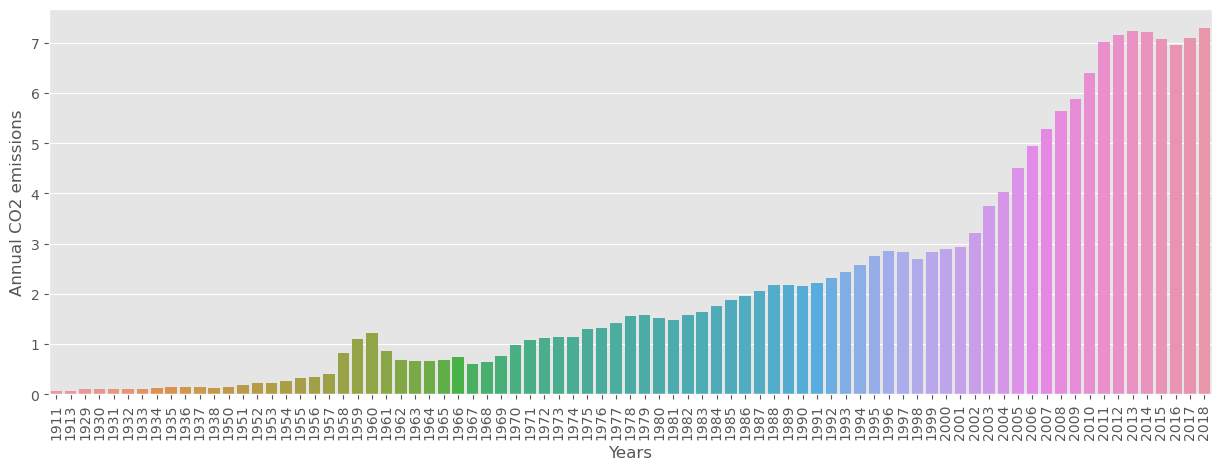

In [26]:
# Make plots for better understand data distribution and trends
# How CO2 emission increase over the years in 20 century
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(dfChina["Year"])
ax.set_xticklabels(dfChina["Year"], rotation=90, size=10)
sns.barplot(data = dfChina, x = "Year", y = "Annual_CO2_emission_per_capita",ax=ax)
plt.ylabel("Annual CO2 emissions")
plt.xlabel("Years")
plt.show()

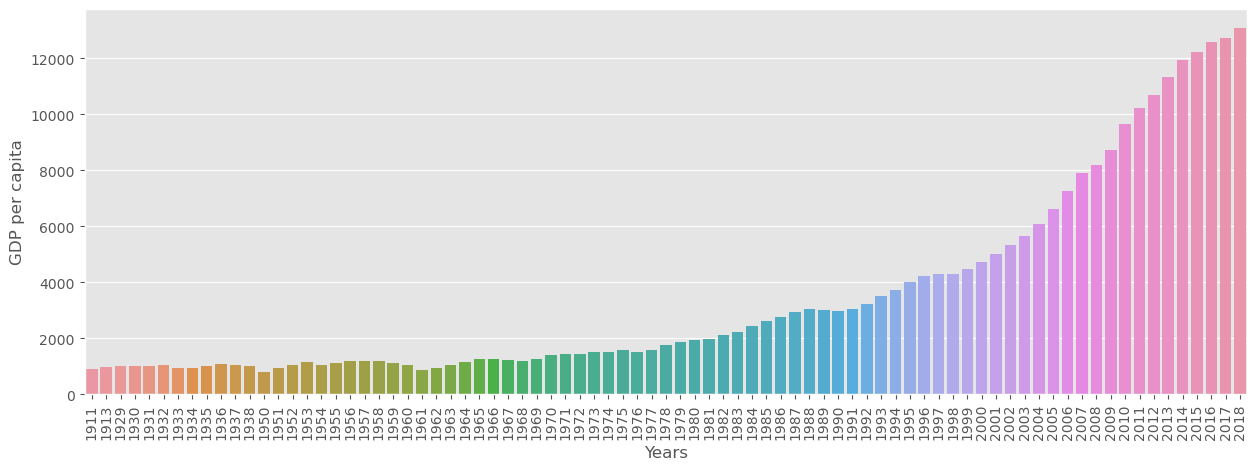

In [27]:
# Make plots for better understand data distribution and trends
# How GDP increase over the years in 20 century
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(dfChina["Year"])
ax.set_xticklabels(dfChina["Year"], rotation=90, size=10)
sns.barplot(data = dfChina, x = "Year", y = "GDP_per_capita",ax=ax)
plt.ylabel("GDP per capita")
plt.xlabel("Years")
plt.show()

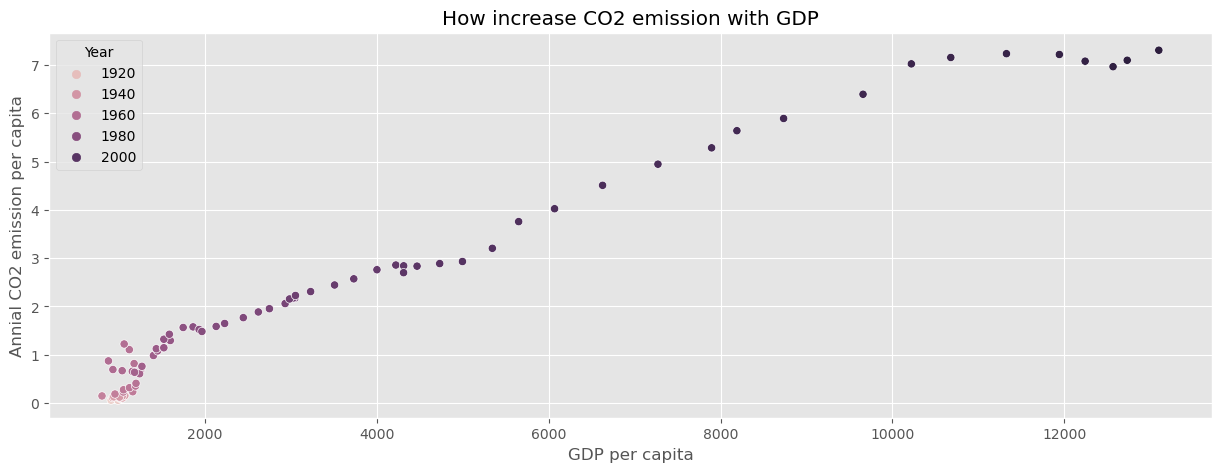

In [28]:
# Make plot for better understand relations between features
plt.figure(figsize=(15,5))
sns.scatterplot(data=dfChina, x="GDP_per_capita", y="Annual_CO2_emission_per_capita", hue = "Year")
plt.title("How increase CO2 emission with GDP")
plt.xlabel("GDP per capita")
plt.ylabel("Annial CO2 emission per capita")
plt.show()

In [29]:
# Check relationship between Co2 Emission and GDP
dfcorr = dfChina[["Annual_CO2_emission_per_capita", "GDP_per_capita"]].corr()
dfcorr

,Annual_CO2_emission_per_capita,GDP_per_capita
Annual_CO2_emission_per_capita,1.000000,0.984694
GDP_per_capita,0.984694,1.000000


<Axes: >

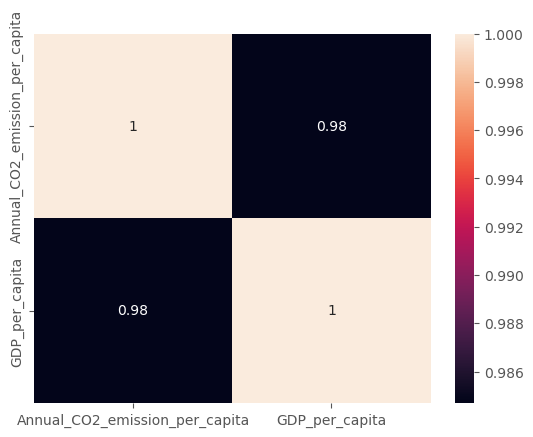

In [30]:
# Show relationship between Co2 Emission and GDP in heatmap 
sns.heatmap(dfcorr, annot=True)

Main conclusions about the above charts:

Throughout the 20th century, China increased its GDP per capita, but in line with this trend it emitted proportionally more CO2 into the atmosphere. This continued until 2010-2012, where a sideways trend in CO2 emissions appears. Nevertheless, GDP continued to grow. Perhaps the Chinese authorities have begun to realize that their astonishing growth needs to be more sustainable, cleaner and climate neutral, and are starting to invest more in "green energy."

4. BUILDING MACHINE LEARNING MODEL

In [31]:
# Predict how future values of the GDP will increase CO2 emissions:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
dfChina.head()

,Entity,Year,Annual_CO2_emission_per_capita,GDP_per_capita
10654,China,1911,0.058271,905.0
10656,China,1913,0.056213,985.0
10672,China,1929,0.100448,1003.0
10673,China,1930,0.102641,1012.0
10674,China,1931,0.106968,1015.0


In [33]:
# Set X and y value
X = dfChina[["GDP_per_capita"]].values
y = dfChina["Annual_CO2_emission_per_capita"]

In [34]:
# Split X and y values for test and train sample
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10) 

In [35]:
# Apply Linear Regression model to the train datas
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Example forecast of how the future level of GDP will be reflected in CO2 emissions (in billions of tons) into the atmosphere if China abandons "green energy"
x_pred = 15000
y_pred = model.predict([[x_pred]])
print(f"If China will be have a GDP at the level {x_pred} dollars pres capita, then CO2 emission in this country will be at the level of the: {y_pred} bln tonnes.")

If China will be have a GDP at the level 15000 dollars pres capita, then CO2 emission in this country will be at the level of the: [9.33501662] bln tonnes.


In [37]:
# Check accurency of the model
model.score(X_test, y_test)

0.9608629338497012

In [38]:
# Export data for further uses for example for implement in FAST API
import pickle
with open("D:\\CODS\\DataScience_Portfolio_Projects\\DONE\\LinearRegression_co2-vs-gdp-china\\FAST_API\CO2_model_pickle", "wb") as f:
    pickle.dump(model, f)